# **Using Linear Regression Model to Predict the Housing Prices in Boston**

**1. Import all the the required Python libraries**

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from numpy import sqrt,mean, absolute
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error


**2. Load the Boston Housing Dataset from sklearn**

In [72]:
from sklearn.datasets import load_boston
boston = load_boston()

C:\Users\jayva\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [73]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [74]:
 boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [75]:
boston.data.shape

(506, 13)

In [76]:
#Print columns name
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [77]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [78]:
# Insert the Boston Housing Data into Dataframe
bos=pd.DataFrame(boston.data)

In [79]:
bos

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [80]:
#Add column names to Dataframe
bos.columns = boston.feature_names

In [81]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [82]:
boston.target.shape

(506,)

In [83]:
bos['Price']=boston.target

In [84]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


**3. Use describe() to get basic summary statistics for each of the columns**

In [85]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**4. Use scatter plots between variables CRIM (per capita crime rate by town), RM (average number of rooms per dwelling), AGE (Proportion of owner-occupied units built prior to 1940) and Hosuing Price in Boston**

Text(0, 0.5, 'Hosuing Price in Boston')

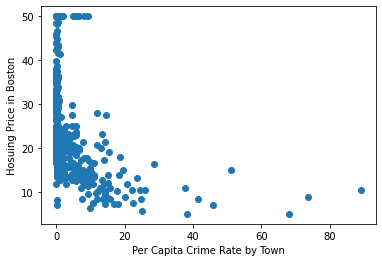

In [86]:
plt.scatter(bos.CRIM,bos.Price)
plt.xlabel("Per Capita Crime Rate by Town")
plt.ylabel("Hosuing Price in Boston")

Text(0, 0.5, 'Hosuing Price in Boston')

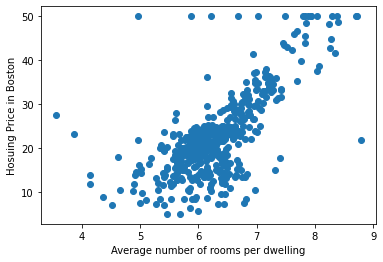

In [87]:
plt.scatter(bos.RM,bos.Price)
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Hosuing Price in Boston')

Text(0, 0.5, 'Hosuing Price in Boston')

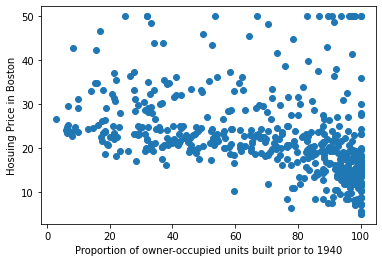

In [88]:
plt.scatter(bos.AGE,bos.Price)
plt.xlabel('Proportion of owner-occupied units built prior to 1940')
plt.ylabel('Hosuing Price in Boston')

<AxesSubplot:xlabel='RM', ylabel='Price'>

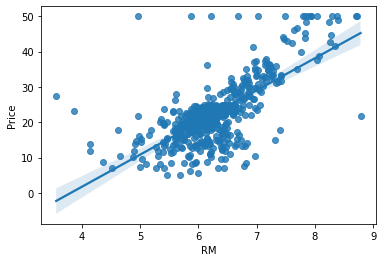

In [89]:
sns.regplot(x='RM', y='Price', data=bos, fit_reg=True)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

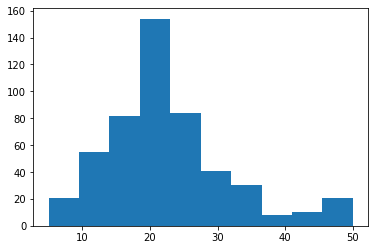

In [22]:
plt.hist(bos.Price)

**5. Fitting Linear Regression using statsmodels**

In [90]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [91]:
m=ols('Price ~ RM',bos).fit()

In [26]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           2.49e-74
Time:                        12:36:16   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The value of the RM coffecient(9.1021) is statistically significant as P>|t| is so small, basically zero. This means RM is significant predictor of Price. The regression coefficient for RM of 9.1021 means that on average, each additional room is associated with an increase of house price by $9,100 net of the other variables.**

**5. Fitting Linear Regression using sklearn**

In [27]:
x=bos.drop('Price', axis=1)
y=bos.Price

In [94]:
#Create a LinearRegression object
lm = LinearRegression()

In [29]:
lm

LinearRegression()

In [95]:
#Fit a linear model, lm.fit() function estimates the coefficients the linear regression using least squares
lm.fit(x,bos.Price)

LinearRegression()

In [31]:
lm.fit

<bound method LinearRegression.fit of LinearRegression()>

In [32]:
lm.intercept_

36.459488385089806

In [33]:
# Splitting the Dataset into Test and Train
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [34]:
clf=lm.fit(x_train,y_train)

In [35]:
print (clf.intercept_,clf.coef_)

31.631084035692954 [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]


In [36]:
prediction = lm.predict(x_test)

In [37]:
#Obtain a predicted probability score of a given event using a logistic regression model
lm.score (x_test,y_test)

0.7112260057484923

In [38]:
#Calculating the mean square error
mean_squared_error(y_test,prediction)

21.517444231177286

**6. Using K-Folds cross-validator. Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default)**


In [39]:
cv=KFold(n_splits=5,random_state=42, shuffle=True)

In [40]:
scores = cross_val_score(lm,x,y,cv=cv)

In [41]:
scores

array([0.66875949, 0.7342547 , 0.70986601, 0.77595168, 0.68727731])

In [42]:
scores1 = cross_val_score(lm,x,y,scoring='neg_mean_squared_error',cv=cv)

In [96]:
#Cross validation gave as reduced value of root mean square error
sqrt(mean(absolute(scores)))

0.7361314198125903

In [44]:
cross_validation_score_ridge = []
alpha=[]

In [48]:
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(x_train, y_train)
    scores = cross_val_score(ridgeModel, x, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_validation_score_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)

In [53]:
alpha

[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]

In [52]:
cross_validation_score_ridge

[22.880608596361245,
 24.290025821905772,
 25.110242012791222,
 25.616687037593177,
 25.94397145373362,
 26.163442226131313,
 26.31534455003462,
 26.42352447439243]

In [54]:
results=pd.DataFrame({'Alpha':alpha,'Cross_Validation_Score':cross_validation_score_ridge})

In [55]:
results

,Alpha,Cross_Validation_Score
0,0.25,22.880609
1,0.50,24.290026
2,0.75,25.110242
3,1.00,25.616687
4,1.25,25.943971
5,1.50,26.163442
6,1.75,26.315345
7,2.00,26.423524
